In [1]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)

from sklearn import preprocessing
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import (GridSearchCV,
                                     RandomizedSearchCV,
                                     train_test_split)

import seaborn as sns
# sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
%load_ext autoreload
% autoreload 2

In [3]:
# Suppress scientific notation
np.set_printoptions(precision=4, suppress=True)

In [4]:
import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objects as go

import cufflinks as cf

In [5]:
# Load data where first row = column headers
filename = 'data/Student Dataset.xlsx'
df = pd.read_excel(filename, header=0)
df.head()

,ID,Major,HighSchoolGPA,SATScores,AppliedtoanotherUC,AdmittedtoanotherUC,Race,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,FirstMathClassGrade,@1stSemesterGPA,Retained1stYear,Graduated
0,74542,Psychology,3.60,1030,Yes,Yes,Hispanic,Yes,F,6,3,A+,1.0,N,No
1,67208,Undeclared,3.60,740,No,No,Hispanic,Yes,M,13,3,D,1.0,N,No
2,72290,Sociology,3.60,970,Yes,Yes,Hispanic,Yes,F,0,3,F,1.0,N,No
3,76242,Sociology,3.60,860,Yes,Yes,Hispanic,No,M,14,3,F,1.0,N,No
4,196944,Computer Science & Engineering,3.72,690,Yes,Yes,Unknown,Yes,F,0,7,I,1.0,N,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 15 columns):
ID                           2992 non-null int64
Major                        2992 non-null object
HighSchoolGPA                2992 non-null float64
SATScores                    2992 non-null int64
AppliedtoanotherUC           2992 non-null object
AdmittedtoanotherUC          2992 non-null object
Race                         2992 non-null object
FirstGeneration              2992 non-null object
Gender                       2992 non-null object
TotalHSHonorsCoursesTaken    2992 non-null int64
MathPlacementScore           2992 non-null int64
FirstMathClassGrade          2992 non-null object
@1stSemesterGPA              2992 non-null float64
Retained1stYear              2992 non-null object
Graduated                    2992 non-null object
dtypes: float64(2), int64(4), object(9)
memory usage: 350.8+ KB


In [7]:
df.describe()

,ID,HighSchoolGPA,SATScores,TotalHSHonorsCoursesTaken,MathPlacementScore,@1stSemesterGPA
count,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,151368.364973,3.460130,969.959893,3.927139,5.625000,2.637465
std,72346.987190,0.398805,162.589785,4.876342,2.561921,0.590995
min,13218.000000,2.300000,530.000000,0.000000,1.000000,1.000000
25%,78162.000000,3.120000,870.000000,0.000000,3.000000,2.230000
50%,149974.000000,3.620000,960.000000,0.000000,6.000000,2.690000
75%,203463.000000,3.700000,1080.000000,8.000000,8.000000,3.060000
max,285358.000000,4.220000,1590.000000,53.000000,10.000000,4.000000


In [8]:
df.isnull().sum(), df.isna().sum()

(ID                           0
 Major                        0
 HighSchoolGPA                0
 SATScores                    0
 AppliedtoanotherUC           0
 AdmittedtoanotherUC          0
 Race                         0
 FirstGeneration              0
 Gender                       0
 TotalHSHonorsCoursesTaken    0
 MathPlacementScore           0
 FirstMathClassGrade          0
 @1stSemesterGPA              0
 Retained1stYear              0
 Graduated                    0
 dtype: int64, ID                           0
 Major                        0
 HighSchoolGPA                0
 SATScores                    0
 AppliedtoanotherUC           0
 AdmittedtoanotherUC          0
 Race                         0
 FirstGeneration              0
 Gender                       0
 TotalHSHonorsCoursesTaken    0
 MathPlacementScore           0
 FirstMathClassGrade          0
 @1stSemesterGPA              0
 Retained1stYear              0
 Graduated                    0
 dtype: int64)

In [9]:
df['ID'].duplicated().sum()

4

In [10]:
df['Major'].unique()

array(['Psychology', 'Undeclared', 'Sociology',
       'Computer Science & Engineering', 'Earth Systems Science',
       'Biological Sciences', 'Management & Business Economics',
       'Bioengineering', 'Undeclared SSHA', 'Environmental Engineering',
       'Applied Mathematical Sciences', 'Management &Business Economics',
       'Anthropology', 'History', 'Materials Sci & Engineering',
       'Chemical Sciences', 'Undeclared Engineering',
       'Literatures and Cultures', 'Mechanical Engineering',
       'Political Science', 'Social and Cognitive Science', 'Physics',
       'Undeclared Natural Sciences', 'Economics', 'Cognitive Science',
       'English', 'Public Health', 'Spanish'], dtype=object)

In [11]:
df['Race'].unique()

array(['Hispanic', 'Unknown', 'Asian', 'White', 'Pacific Islander',
       'African-American', 'Native American'], dtype=object)

### Exploring the data:

- using .isnull() and .isna() shows there are no null or Nan values in the data set.

- using df['ID'] shows there are 4 duplicate IDs. Can eliminate this column since data is anonymized and this series does not affect the model.

- FirstMathClassGrade column is listed as A+, A, A-, B+, B... Need to convert them to floats. UCMerced website provides guidance.

- columns containing nominal categorical variables (variables that are not intrinsically ordered, eg., AppliedtoanotherUC, AdmittedtoanotherUC, FirstGeneration, Graduated, Gender and Retained1stYear) with values such as [Yes, Y, M], [No, N and F] are converted to 1 or 0, respectively.

- columns containing multiple categorical variables(Major and Race) must be one-hot encoded to fit the models used by sklearn. Will also need to drop a category column to avoid multicollinearity. Not sure which columns to address here, but will drop 'Cognitive Science' from Major feaure and 'Native American' from Race feature. THIS MUST BE RE-VISITED!

- using .unique() on Major column shows Management & Business Economics appears twice due to mispelling. NB: multiple Unknown "majors" exist.

- there is a high correlation between Retained1stYear and Graduated. Will not use this linear correlation for the classification model.

- since 'AppliedtoanotherUC' and 'AdmittedtoanotherUC' are highly correlated, will drop admitted column


In [12]:
# Helper functions to clean and prepare data for ML

# May not need to use this first function since I am passing columns into a new dataframe
def remove_col(dataframe, column_name):
    '''Uses pandas .drop() method to drop a column.
    This is not done inplace, so must save dataframe to new one
    Input: 
        df: pandas dataframe
        column_name: a str denoting a column name in dataframe
           
    Output: 
        dataframe that must be assigned to a new variable
    '''
    return dataframe.drop(columns=column_name)


def to_replace(pandas_obj, 
                orig_val=['A+', 'A', 'A-', 'B+', 'B', 'B-', 
                              'C+', 'C', 'C-', 'D+', 'D', 'D-', 'F', 'I', 'W'], 
               new_val=[4.0, 4.0, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 
                        1.0, 0.7, 0.0, 0.0, 0.0]):
    '''Uses pandas .replace() method to replace values in a pandas series.
    This is not done inplace, so must save dataframe to new one 
    Input: 
        pandas_obj: can be a pandas series column or a dataframe
        original_val: a list of values from series
        new_val: a list of values to replace series with
        
        The default lists are for converting letter grades to points. Points for new_val
        were obtained from 
        https://registrar.ucmerced.edu/policies/grades/gpa-calculator
           
    Output: 
        a new series or dataframe dependng on input
    '''
    return pandas_obj.replace(orig_val, new_val)


def ohe(series, drop_col):
    '''Uses pandas .get_dummies() to one-hot encode (ohe) values in a categorical variable 
    (dataframe column). A column from the ohe series must be dropped to avoid 
    multicollinearity.
    Input:
        series: a pandas series
        drop_col: column to drop after one-hot encoding
    Output:
        an ohe pandas dataframe
    '''
    ohe_df = pd.get_dummies(series)
    return ohe_df.drop(columns=drop_col)

In [13]:
# Implement helper functions to clean and process data

In [17]:
df['FirstMathClassScore'] = to_replace(df['FirstMathClassGrade'])
df2 = to_replace(df, ['Yes', 'Y', 'M', 'No', 'N', 'F'], [1, 1, 1, 0, 0, 0])
df2['Major'] = to_replace(df['Major'],
                          orig_val=['Management &Business Economics'],
                          new_val =['Management & Business Economics'])


In [18]:
major_ohed = ohe(df['Major'], 'Cognitive Science')
race_ohed = ohe(df['Race'], 'Native American')


In [19]:
col_lst = df2.columns.to_list()
new_df = df2[['HighSchoolGPA', 'SATScores', 'AppliedtoanotherUC', 'FirstGeneration', 'Gender', 
              'TotalHSHonorsCoursesTaken', 'MathPlacementScore', '@1stSemesterGPA', 'FirstMathClassScore']]
new_df.head()

,HighSchoolGPA,SATScores,AppliedtoanotherUC,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,@1stSemesterGPA,FirstMathClassScore
0,3.60,1030,1,1,0,6,3,1.0,4.0
1,3.60,740,0,1,1,13,3,1.0,1.0
2,3.60,970,1,1,0,0,3,1.0,0.0
3,3.60,860,1,0,1,14,3,1.0,0.0
4,3.72,690,1,1,0,0,7,1.0,0.0


In [20]:
final_df = pd.concat([new_df, major_ohed, race_ohed, df2['Graduated']], axis =1)
final_df

,HighSchoolGPA,SATScores,AppliedtoanotherUC,FirstGeneration,Gender,TotalHSHonorsCoursesTaken,MathPlacementScore,@1stSemesterGPA,FirstMathClassScore,Anthropology,...,Undeclared Engineering,Undeclared Natural Sciences,Undeclared SSHA,African-American,Asian,Hispanic,Pacific Islander,Unknown,White,Graduated
0,3.60,1030,1,1,0,6,3,1.0,4.0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.60,740,0,1,1,13,3,1.0,1.0,0,...,0,0,0,0,0,1,0,0,0,0
2,3.60,970,1,1,0,0,3,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
3,3.60,860,1,0,1,14,3,1.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,3.72,690,1,1,0,0,7,1.0,0.0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,2.46,1120,1,0,0,0,5,4.0,0.0,0,...,0,0,1,0,0,0,0,0,1,0
2988,3.60,1240,1,1,1,8,3,4.0,4.0,0,...,0,0,0,0,0,1,0,0,0,1
2989,3.10,1080,1,0,0,0,3,4.0,0.0,0,...,0,0,0,0,0,0,0,0,1,1
2990,2.52,1120,1,0,0,0,3,4.0,0.0,0,...,0,0,0,0,0,0,0,0,1,1


In [21]:
# Helper function to run LogisticRegresion

def logreg_mod(X, y, C=1.0, max_iter=1000):

    
    
    # Split data into training set and testing set
    # 70% of the data set is used to for training and 30% of the data is used to test the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Instantiate Logistic Regression model and fit it to training data and
    # test the model it 30% of the data that is held back during training
    mod = LogisticRegression(C=C, 
                             max_iter=max_iter, 
                             random_state=45)
    
    mod.fit(X_train, y_train)
    y_pred_prob = mod.predict_proba(X_test)[:, 1]
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_prob]
#         my_accur = (y_test == y_pred).sum() / len(y_test)    # Do not need to calculate this myself
                                                           # built-in accuracy_sore() method does this
    
    # logloss and others requires the probabilities that Yes or 1 is predicted
    logl = metrics.log_loss(y_test, y_pred_prob)
        
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)
    auc = metrics.roc_auc_score(y_test, y_pred_prob)
    
    # Precision and accuracy requires y-predictions (0, 1)
    precision = metrics.precision_score(y_test, y_pred)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    parameters, intercept = mod.coef_, mod.intercept_
    
    return {'model': 'Logistic Regression',
            'X_test': X_test,    # For plotting at the end
            'y_test': y_test,    # For plotting at the end
            'predictions': y_pred,
            'precision': round(precision, 4),
            'accuracy': round(accuracy, 4), 
            'logloss': round(logl, 4), 
            'beta_coeffs': parameters,
            'intercept': mod.intercept_,
            'false pos rate': fpr,
            'true pos rate': tpr,
            'area under curve': round(auc, 4)
           }


In [22]:
# Helper function to run DecisionTreeRegressor

def dtree_mod(X, y, min_samples_split, min_samples_leaf):

    # Split data into training set and testing set
    # 70% of the data set is used to for training and 30% of the data is used to test the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
    # Instantiate DecisionTreeRegressor model and fit it to training data, then test it
    mod = DecisionTreeRegressor(max_depth=max_depth,
                                min_samples_split=min_samples_split, 
                                min_samples_leaf=min_samples_leaf, 
                                random_state=45)
    mod.fit(X_train, y_train)
        
    # Decision Trees do not have predict_proba
    y_pred = mod.predict(X_test)    # .predict()) returns a probability
    y_p = [1 if pred > 0.5 else 0 for pred in y_pred]
        
    # logloss and others requires the probabilities that Yes or 1 is predicted
    logl = metrics.log_loss(y_test, y_pred)
        
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    
    # Precision and accuracy requires y-predictions (0, 1)
    precision = metrics.precision_score(y_test, y_p)
    accuracy = metrics.accuracy_score(y_test, y_p)
    
    return {'model': 'DecisionTreeRegressor',
            'predictions': y_p,
            'precision': round(precision, 4),
            'accuracy': round(accuracy, 4), 
            'logloss': round(logl, 4), 
            'false pos rate': fpr,
            'true pos rate': tpr,
            'area under curve': round(auc, 4)
           }
           

In [38]:
# Helper function to run and ensemble methods, RandomForestClassification and GradientBoostingClassification
# There is still a lot of repetition in this code... need to learn args and kwargs

def ensemble_mods(ensemble_method, X, y, 
                  n_estimators, max_depth, 
                  min_samples_split, min_samples_leaf,
                  subsample=0.5, learning_rate=0.01):
    '''Implements ensemble tree methods--RandomForestClassifier and GradientBoostClassifier. Returns a 
    dictionary containing a number of metrics to determine model quality (logloss, accuracy, false and 
    true positive rates (to make an ROC-AUC curve), AUC). Also returns an array of floats to determine 
    feature importance.
    Input:
        ensemble_method: a string pandas series
        X: array of features
        y: target variable
        parameters: n_estimators, max_depth, min_samples_split,  apply to both ensemble methods. 
                    subsample and learning_rate only apply to GradientBoostingClassifier.
    Output:
        dictionary of seven metric or metric-related items
    '''    
    
    # Exception case:
    if (ensemble_method != 'RandomForestClassifier') & (ensemble_method != 'GradientBoostingClassifier'):
        return "Please try again using either 'RandomForestClassifier' or 'GradientBoostingClassifier'"
    
        
    # Split data into training set and testing set
    # 70% of the data set is used to for training and 30% of the data is used to test the model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Instantiate ensemble model using sklearn's RandomForestClassifier,
    # fit it to the training data and test it using the test data
    if ensemble_method == 'RandomForestClassifier':
        mod = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split, 
                            min_samples_leaf = min_samples_leaf,
                            bootstrap=True, random_state=45)    # random_state is a random_seed
                                                                # remove random_state when testing is done
      
    
    # Instantiate ensemble model using sklearn's GradientBoostingClassifier
    # fit it to the training data and test it using the test data
    if ensemble_method == 'GradientBoostingClassifier':
        mod = GradientBoostingClassifier(n_estimators=n_estimators, 
                                max_depth=max_depth,
                                min_samples_split=min_samples_split, 
                                min_samples_leaf = min_samples_leaf,
                                subsample=subsample, 
                                learning_rate=learning_rate, random_state=45)    # random_state is a random_seed
                                                                                 # remove random_state after testing

    mod.fit(X_train, y_train)
    
    # .predict_proba_ returns tuple of probabilities for (0, 1), so only keep probabilities for 1
    y_pred_prob = mod.predict_proba(X_test)[:, 1]
    
    # To compare "accuracy" against test set,
    # let predicited y-values > 0.5 be 1 and anything else be 0
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_prob]  
    calced_acc = (y_test == y_pred).sum() / len(y_test)

    # Return the coefficient of determination R^2 of the prediction.
    train_coeff = mod.score(X_train, y_train)        
    test_coeff = mod.score(X_test, y_test)
        
    # Also return the features that 'most' affect the model quality
    feat_imp = mod.feature_importances_
    
    # More metrics from model
    logloss = metrics.log_loss(y_test, y_pred_prob)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob)    # returns false positive and true positive rates
    auc = metrics.roc_auc_score(y_test, y_pred_prob)

   
    return {'model': ensemble_method,
            'X_test': X_test,    # For plotting at the end
            'y_test': y_test,    # For plotting at the end
            'predictions': y_pred,
            'logloss': round(logloss, 4),
            'calculated accuracy': round(calced_acc, 4),
            'coeff of determ': [round(train_coeff, 4), round(test_coeff, 4)],
            'false pos rate': fpr,
            'true pos rate': tpr,
            'area under curve': round(auc, 4),
            'feature importance': feat_imp
           }


In [24]:
# Implement helper functions to obtain predictions and metrics

In [25]:
X = final_df.iloc[:, :-1]    # Grab all columns but the Graduated column to make features only dataframe
y = final_df.iloc[:, -1]    # Only grab the target column, the Graduated column

# Logistic Regression with "all" features
n_estimators = 100
max_depth = 8
min_samples_split=2
min_samples_leaf=1

lr1 = logreg_mod(X, y)
# lr1

In [26]:
dtr1 = dtree_mod(X, y, min_samples_split, min_samples_leaf)
# dtr1

In [27]:
X = final_df.iloc[:, :-1]    # Grab all columns but the Graduated column to make features only dataframe
y = final_df.iloc[:, -1]    # Only grab the target column, the Graduated column

# Random Forest with "all" features
n_estimators = 100
max_depth = 8
min_samples_split=2
min_samples_leaf=1

rf1 = ensemble_mods('RandomForestClassifier', X, y, n_estimators, max_depth, min_samples_split, min_samples_leaf)
# rf1

In [28]:
gb1 = ensemble_mods('GradientBoostingClassifier', X, y, n_estimators, max_depth, min_samples_split, min_samples_leaf)
# gb1

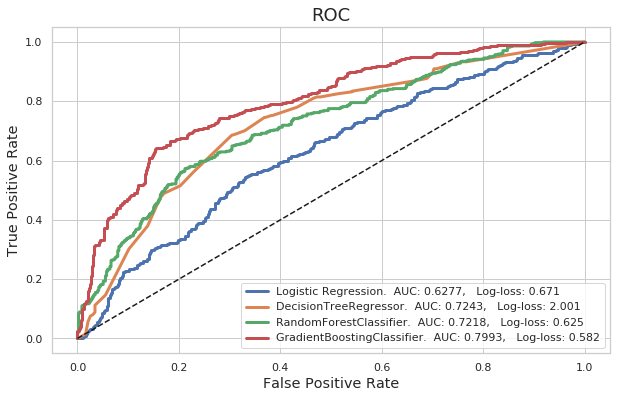

In [29]:
# Plots of first regression and classification models:

results = [lr1, dtr1, rf1, gb1]

fig, ax = plt.subplots(figsize=(10,6))

for model in results:
    ax.plot(model['false pos rate'], model['true pos rate'], 
            label=f"{model['model']}.  AUC: {model['area under curve']:.4f},   Log-loss: {model['logloss']:.3f}",
           linewidth=3)
    ax.set_title('ROC', size ='18')
    ax.set_xlabel('False Positive Rate', size='x-large')
    ax.set_ylabel('True Positive Rate', size='x-large')
    ax.legend(loc='lower right')
    
plt.plot([0,1], [0,1], 'k--')
    
# plt.savefig('ROC - Regs.png')

In [30]:
n_estimators=500
min_samples_split=2
min_samples_leaf=1
max_depth=7

rf_tuned = ensemble_mods('RandomForestClassifier', X, y, n_estimators, max_depth, min_samples_split, min_samples_leaf)

In [31]:
# Gradient Boost Tuned Parameters:

learning_rate = 0.001
n_estimators = 10000
max_depth = 5
subsample = 0.5
min_samples_split = 4

gb_tuned = ensemble_mods('GradientBoostingClassifier', X, y, n_estimators, max_depth, min_samples_split, min_samples_leaf)

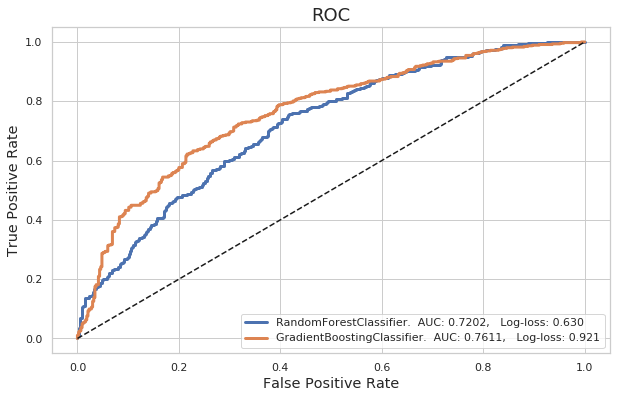

In [32]:
# Plots of regression and classification models using tuned hyperparameters:

results = [rf_tuned, gb_tuned]

fig, ax = plt.subplots(figsize=(10,6))

for model in results:
    ax.plot(model['false pos rate'], model['true pos rate'], 
            label=f"{model['model']}.  AUC: {model['area under curve']:.4f},   Log-loss: {model['logloss']:.3f}",
           linewidth=3)
    ax.set_title('ROC', size ='18')
    ax.set_xlabel('False Positive Rate', size='x-large')
    ax.set_ylabel('True Positive Rate', size='x-large')
    ax.legend(loc='lower right')
    
plt.plot([0,1], [0,1], 'k--')
    
# plt.savefig('ROC - Regs.png')
# ... um, these look worse than w/o tuning. Need to retune

In [33]:
# Helper function to convert feature importance arrays to labels and their importance:

def feat_imp_to_labels(X, features_array, threshold=0.015):
    features_lst = list(zip(X.columns, features_array))
    feature_tups = [(l, f) for (l, f) in features_lst if f > threshold]
    
    sorted_features = sorted(feature_tups, key=lambda tup: tup[1])
    
    features_X = [tup[0] for tup in sorted_features]
    features_y = [tup[1] for tup in sorted_features]
    return features_X, features_y


In [34]:
# IMpletment helper function to plot feature importances

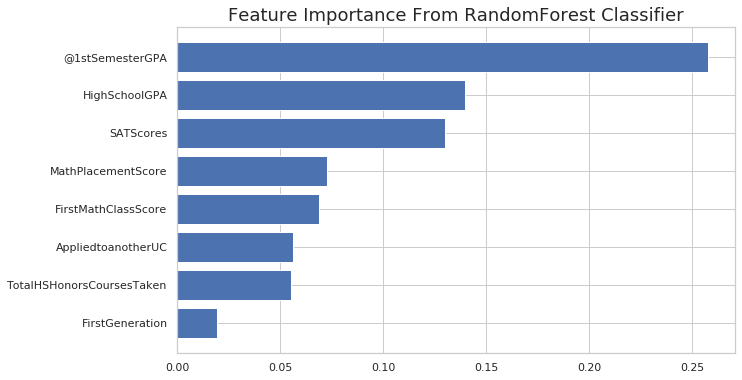

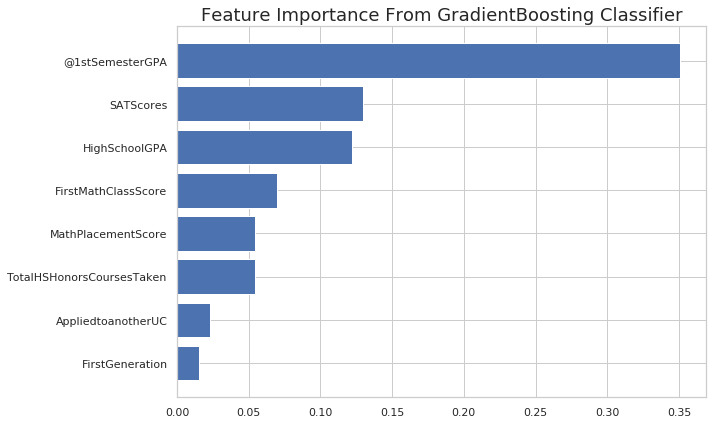

In [35]:
# Plot feature importance for two best models:

# Plot for Random Forest
fig, ax = plt.subplots(figsize=(10,6))

feats_X, feats_y = feat_imp_to_labels(X, rf1['feature importance'])
ax.barh(y = feats_X, width = feats_y)
ax.set_title('Feature Importance From RandomForest Classifier', size=18)


# Plot for Gradient Boosting
fig, ax = plt.subplots(figsize=(10,6))

feats_X, feats_y = feat_imp_to_labels(X, gb1['feature importance'])
ax.barh(y = feats_X, width = feats_y)
ax.set_title('Feature Importance From GradientBoosting Classifier', size=18)
plt.tight_layout()

# plt.savefig('rf_feats.png')
    

In [36]:
X = final_df[['@1stSemesterGPA', 'SATScores']]    # Grab top two most important features
y = final_df.iloc[:, -1]    # Only grab the target column, the Graduated column

# Logistic Regression with "all" features
n_estimators = 100
max_depth = 8
min_samples_split=2
min_samples_leaf=1

lr2 = logreg_mod(X, y)
# lr2

No handles with labels found to put in legend.
No handles with labels found to put in legend.


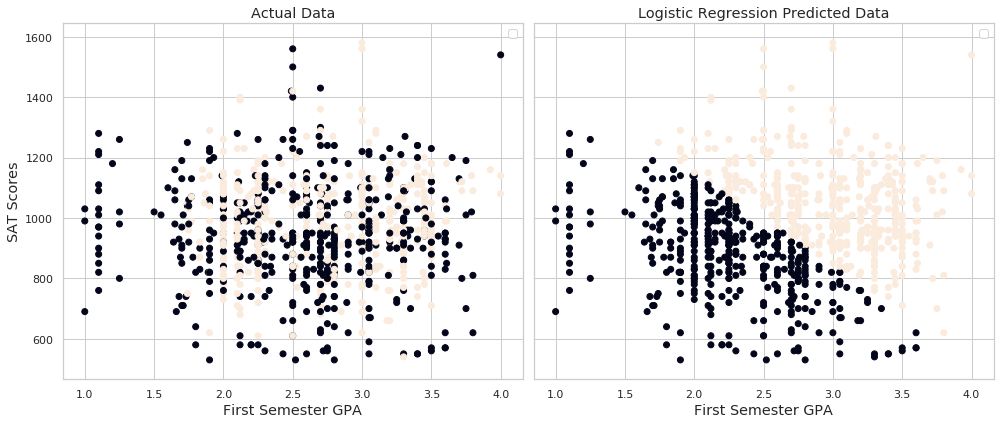

In [40]:
# Plot actual versus predicted data for logistic regression using top two features,
# @1stSemesterGPA and SATScores

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

axs[0].scatter(lr2['X_test'].iloc[:, 0], lr2['X_test'].iloc[:, 1], c=lr2['y_test'])
axs[0].set_xlabel('First Semester GPA', size='x-large')
axs[0].set_ylabel('SAT Scores', size='x-large')
axs[0].set_title('Actual Data', size='x-large')
axs[0].legend()

axs[1].scatter(lr2['X_test'].iloc[:, 0], lr2['X_test'].iloc[:, 1], c=lr2['predictions'])
axs[1].set_xlabel('First Semester GPA', size='x-large')
axs[1].set_title('Logistic Regression Predicted Data', size='x-large')
axs[1].legend()
plt.tight_layout()

# That looks pretty bad

In [ ]:
# Do the same with Gradient Boosting Classifier

In [39]:
n_estimators = 100
max_depth = 8
min_samples_split=2
min_samples_leaf=1

gb2 = ensemble_mods('GradientBoostingClassifier', X, y, n_estimators, max_depth, min_samples_split, min_samples_leaf)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


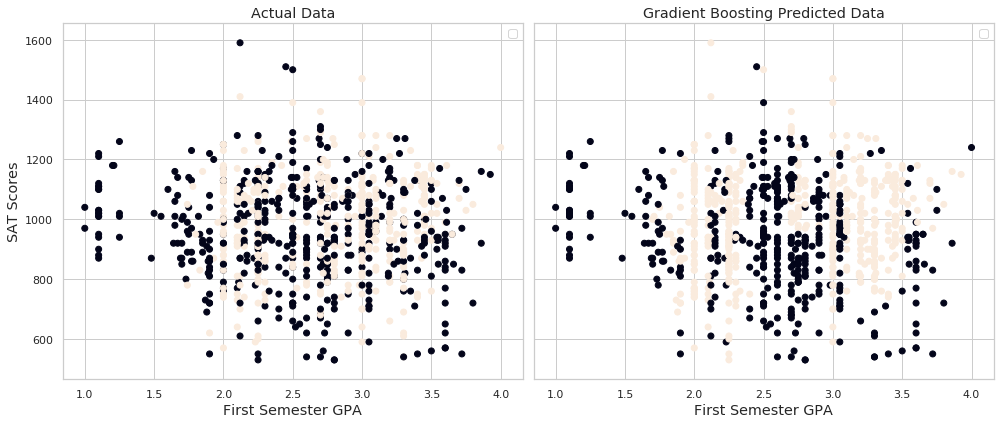

In [41]:
# Plot actual versus predicted data for gradient boosting using top two features,
# @1stSemesterGPA and SATScores

fig, axs = plt.subplots(1, 2, figsize=(14,6), sharey=True)

axs[0].scatter(gb2['X_test'].iloc[:, 0], gb2['X_test'].iloc[:, 1], c=gb2['y_test'])
axs[0].set_xlabel('First Semester GPA', size='x-large')
axs[0].set_ylabel('SAT Scores', size='x-large')
axs[0].set_title('Actual Data', size='x-large')
axs[0].legend()

axs[1].scatter(gb2['X_test'].iloc[:, 0], gb2['X_test'].iloc[:, 1], c=gb2['predictions'])
axs[1].set_xlabel('First Semester GPA', size='x-large')
axs[1].set_title('Gradient Boosting Predicted Data', size='x-large')
axs[1].legend()
plt.tight_layout()

# That looks better